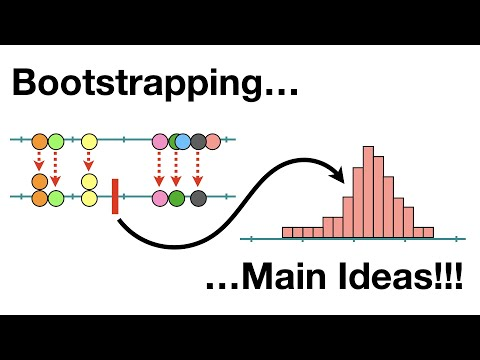

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation (SD) measures how spread out data points are around the mean, showing the variability within a dataset. It’s calculated by looking at the differences between each data point and the mean. The larger the SD, the more spread out the values are.

The standard error of the mean (SEM), on the other hand, tells us how precise the sample mean is as an estimate of the population mean. SEM is derived from the SD but adjusts for sample size, becoming smaller as the sample size increases, reflecting greater confidence in the mean.

Bootstrapping, a resampling technique, helps illustrate the difference. By repeatedly sampling from the data, i can calculate both SD and SEM. The SD reflects variability within each sample, while SEM shows how much the sample means vary across resamples, typically smaller than SD since it accounts for sample size.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

1. Generate Bootstrap Samples: I resample my dataset with replacement multiple times (e.g., 1,000 or 10,000 times) and calculate the mean for each resample.
2. Calculate SEM: I find the SEM by taking the standard deviation of the resampled means, using the formula
3. Calculate the 95% Confidence Interval: Assuming the sample means are normally distributed, I use the formula .....1.96×SEM, where 1.96 corresponds to the 95% confidence level.
4. Interpret the Confidence Interval: This interval shows where 95% of the sample means should fall. For example, if the mean is 50 and SEM is 2, my 95% CI would be [46.08, 53.92].

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

Alternatively, I could:

1. Resample the data (with replacement) multiple times.
2. Calculate the mean for each resampled dataset.
3. Sort the bootstrapped means.
4. Extract the 2.5th and 97.5th percentiles.
5. The interval between these two percentiles is your 95% bootstrapped confidence interval.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [6]:
import numpy as np

# Sample data - replace with your actual dataset
data = np.array([12, 7, 9, 15, 13, 8, 10, 11, 14, 16])

# Number of bootstrap resamples
n_resamples = 10000

# Function to generate bootstrap samples and calculate the statistic (mean in this case)
def bootstrap_confidence_interval(data, n_resamples=10000, stat_func=np.mean, ci=95):
    """
    Generates a bootstrap confidence interval for a given population statistic.
    
    Parameters:
    - data: The original sample data.
    - n_resamples: The number of bootstrap resamples to take.
    - stat_func: The function to compute the statistic of interest (e.g., np.mean for mean).
    - ci: The desired confidence interval percentage (e.g., 95 for a 95% CI).
    
    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """
    
    # List to store bootstrap sample statistics
    bootstrapped_stats = []
    
    # Create bootstrap resamples and compute the statistic for each resample
    for _ in range(n_resamples):
        # Resample with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Compute the desired statistic (mean by default) and store it
        bootstrapped_stats.append(stat_func(bootstrap_sample))
    
    # Sort the bootstrapped statistics
    sorted_bootstrap_stats = np.sort(bootstrapped_stats)
    
    # Compute the lower and upper percentiles for the CI
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    
    # Get the bounds of the confidence interval
    lower_bound = np.percentile(sorted_bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(sorted_bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the population mean
ci_mean = bootstrap_confidence_interval(data, n_resamples=n_resamples, stat_func=np.mean, ci=95)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# *** MODIFICATION SECTION ***
# To calculate a 95% bootstrap confidence interval for the median, just change the stat_func argument to np.median:
ci_median = bootstrap_confidence_interval(data, n_resamples=n_resamples, stat_func=np.median, ci=95)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")

# You can replace np.mean with other functions depending on the parameter you're interested in.
# For example, to compute the bootstrap confidence interval for a trimmed mean (e.g., 10% trimmed mean):
from scipy.stats import trim_mean

# Function to calculate a trimmed mean
def trimmed_mean_func(sample):
    return trim_mean(sample, proportiontocut=0.1)

ci_trimmed_mean = bootstrap_confidence_interval(data, n_resamples=n_resamples, stat_func=trimmed_mean_func, ci=95)
print(f"95% Bootstrap Confidence Interval for the Trimmed Mean: {ci_trimmed_mean}")

95% Bootstrap Confidence Interval for the Mean: (9.7, 13.3)
95% Bootstrap Confidence Interval for the Median: (9.0, 14.0)
95% Bootstrap Confidence Interval for the Trimmed Mean: (9.375, 13.625)


Summary 1-4:
1. The difference between the standard error of the mean (SEM) and the standard deviation using the concept of bootstrapping. The standard deviation measures the spread of the original data, while the SEM measures the variability in the sample mean, shrinking as the sample size increases.

2. How to use the standard error of the mean to create a 95% confidence interval. I explained how multiplying the SEM by 1.96 provides the confidence interval bounds, assuming normality.

3. How to create a 95% bootstrapped confidence interval using bootstrapped means without calculating the SEM. This involves generating bootstrap samples, calculating the mean for each, and finding the 2.5th and 97.5th percentiles of the sorted bootstrap means.

4. I provided Python code to calculate a 95% bootstrap confidence interval for the population mean and showed how to modify it to compute confidence intervals for other statistics like the median or variance using np.percentile.

5. We clarified how the np.percentile function works, explaining how it computes percentile values to construct confidence intervals.

6. Lastly, I explained the use of stat_func=np.mean in the code, clarifying that np.mean is a built-in NumPy function used to compute the mean and that it can be replaced with other statistical functions like np.median for flexibility in calculating different confidence intervals.

link: https://chatgpt.com/share/66fc719b-b810-800d-b1d5-11bf2270395a

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

A population parameter is a fixed value that describes the entire population, like the population mean (μ), but it's usually unknown since we can't collect data from everyone. A sample statistic, like the sample mean (x̄), is calculated from the sample data and acts as our best estimate of the population parameter.

When creating confidence intervals, I use the sample statistic to estimate the population parameter. The interval gives a range that likely contains the true population value, reflecting the uncertainty due to sampling. It’s important to recognize that the sample statistic can change with each sample, while the population parameter is fixed, which is why we create the confidence interval to estimate that fixed, unknown value.

summary: In this conversation, we discussed the differences between a population parameter and a sample statistic, particularly in the context of confidence intervals. A parameter is a fixed, typically unknown value that describes a characteristic of an entire population, while a statistic is a value calculated from a sample that estimates the population parameter. The need to distinguish between them is important because confidence intervals help estimate the population parameter based on the sample statistic, accounting for uncertainty due to sampling variability.

The key differences between statistics and parameters were also clarified: a parameter applies to the whole population and is fixed, whereas a statistic pertains to a sample and can vary between samples.

link: https://chatgpt.com/share/66fc74c7-8758-800d-8a92-66cd465d5e6f

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
What is the process of bootstrapping?
What is the main purpose of bootstrapping?
If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Further Guidance

What is the process of bootstrapping?
So, bootstrapping is this cool method in statistics where instead of doing some complicated math, we let the computer do a lot of the work for us. Here’s how it works: let’s say you have a set of data, but it’s not enough to really understand the whole population. Bootstrapping helps you simulate having more data. You take your original sample, and you keep creating new samples from it by randomly picking data points with replacement (which means you might pick the same value more than once). You do this a bunch of times—like, hundreds or even thousands of times. For each of these "new" samples, you calculate whatever statistic you're interested in, like the mean. By doing this over and over, you get a sense of the variation or spread in your data without needing to actually collect more samples.

What is the main purpose of bootstrapping?
The main point of bootstrapping is to estimate the variability in your data. It helps you understand how much the results you got from your sample could change if you were able to take many samples. Basically, it gives you an idea of how uncertain your statistic (like the mean) is and how reliable your sample is for making guesses about the larger population. It’s great when you have a small or tricky dataset because it doesn’t rely on assuming your data fits some neat mathematical pattern.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your guess might be plausible?
Alright, let’s say you have a hunch about what the average of a whole population is (maybe you think it’s around 50), and you’ve got a sample of data from that population. Here’s how you could use bootstrapping to see if your guess is reasonable:

Take your sample and, just like before, use bootstrapping to generate a bunch of new samples (by randomly picking data points from your sample, with replacement). For each of these bootstrapped samples, calculate the mean. After repeating this a ton of times, you’ll end up with a distribution of these bootstrapped means. Now, look at where your hypothesized average (50 in this case) falls in this distribution. If most of your bootstrapped sample means are close to 50, that’s a good sign your guess might be plausible. But if 50 is way out there, far from most of your bootstrapped means, it’s probably not a good guess for the population average.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

If the confidence interval includes zero, it means we can’t rule out the possibility that the drug has no effect, so we can’t reject the null hypothesis. Even though the sample mean isn’t zero, the interval shows that "no effect" is still possible.

However, if the confidence interval doesn’t include zero, it suggests the drug likely has an effect, and we can reject the null hypothesis because "no effect" is no longer a reasonable possibility.

8. Complete the following assignment.
Vaccine Data Analysis Assignment
The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

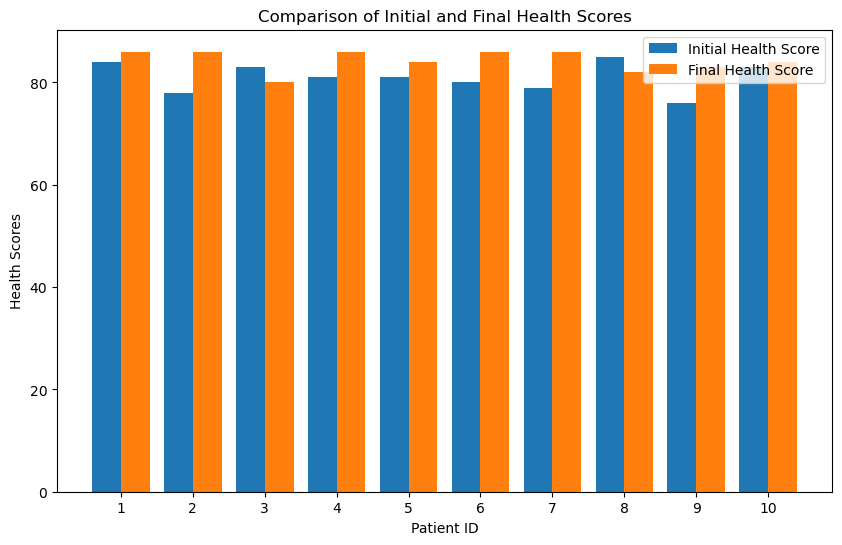

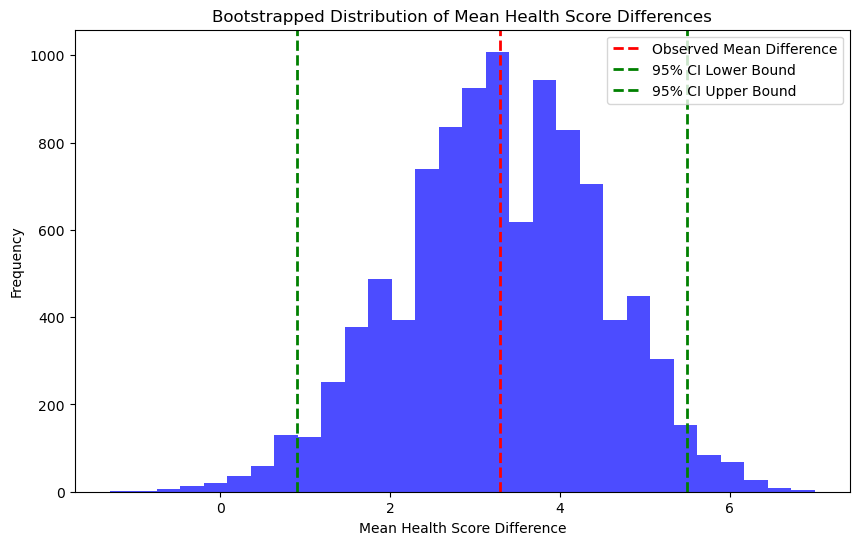

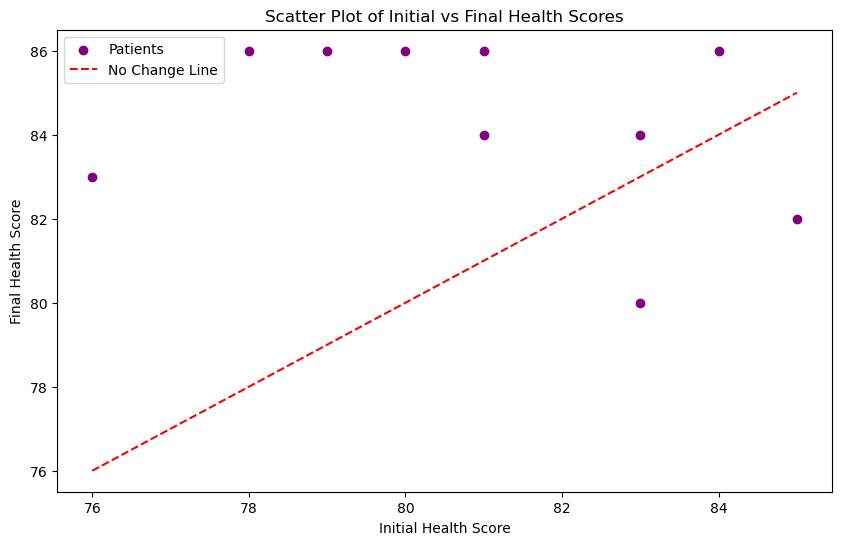

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the DataFrame with the provided data
# This sets up the patient data with columns for age, gender, initial health score, and final health score.
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Step 2: Calculate the difference in health scores
# The health score difference is calculated for each patient (FinalHealthScore - InitialHealthScore).
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 3: Plot the initial and final health scores for visual comparison
# A bar chart is plotted to visually compare the initial and final health scores of each patient.
plt.figure(figsize=(10, 6))
plt.bar(df['PatientID'], df['InitialHealthScore'], width=0.4, label='Initial Health Score', align='center')
plt.bar(df['PatientID'] + 0.4, df['FinalHealthScore'], width=0.4, label='Final Health Score', align='center')
plt.xlabel('Patient ID')
plt.ylabel('Health Scores')
plt.title('Comparison of Initial and Final Health Scores')
plt.xticks(df['PatientID'] + 0.2, df['PatientID'])
plt.legend()
plt.show()

# Step 4: Bootstrapping analysis
# Initialize the bootstrapping with 10,000 iterations, storing the bootstrapped means, and calculate the observed mean difference.
n_iterations = 10000  # Number of bootstrap samples to generate
bootstrap_means = []  # Store the mean difference from each bootstrap sample
observed_mean_difference = np.mean(df['HealthScoreDifference'])  # Observed mean difference in original data

# Step 5: Perform bootstrapping (resample the data with replacement)
# For each iteration, we randomly resample the health score differences and calculate the mean.
for _ in range(n_iterations):
    bootstrap_sample = df['HealthScoreDifference'].sample(frac=1, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert the bootstrap means list to a numpy array for easier calculations
bootstrap_means = np.array(bootstrap_means)

# Step 6: Calculate the 95% confidence interval
# Use percentiles to compute the lower and upper bounds of the 95% confidence interval from the bootstrapped data.
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Step 7: Plot the bootstrap distribution
# A histogram of the bootstrapped mean differences is created with the observed mean and confidence interval bounds marked.
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue')
plt.axvline(observed_mean_difference, color='red', linestyle='dashed', linewidth=2, label='Observed Mean Difference')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='95% CI Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='95% CI Upper Bound')
plt.title('Bootstrapped Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the results: confidence interval and observed mean difference
# Output the lower and upper bounds of the confidence interval and the observed mean difference.
(lower_bound, upper_bound, observed_mean_difference)

# Step 8: Create a scatter plot to visualize the relationship between Initial and Final Health Scores
# A scatter plot shows the relationship between initial and final health scores for each patient. 
# A red dashed line represents no change, where the final score equals the initial score.
plt.figure(figsize=(10, 6))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='purple', label='Patients')
plt.plot([df['InitialHealthScore'].min(), df['InitialHealthScore'].max()],
         [df['InitialHealthScore'].min(), df['InitialHealthScore'].max()], 'r--', label='No Change Line')

plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Scatter Plot of Initial vs Final Health Scores')
plt.legend()
plt.show()


Step 1: We set up the patient data using a DataFrame with relevant columns such as age, gender, and health scores.
Step 2: We calculate the difference between the initial and final health scores to assess the impact of the vaccine.
Step 3: A bar chart is created to provide a visual comparison between the initial and final health scores for each patient.
Step 4: We initialize parameters for bootstrapping, including the number of iterations and storage for bootstrapped means. The observed mean difference is calculated.
Step 5: We perform bootstrapping by resampling the data with replacement for 10,000 iterations, calculating the mean difference each time.
Step 6: The 95% confidence interval is calculated from the bootstrapped mean differences using percentiles.
Step 7: A histogram of the bootstrapped mean differences is plotted, highlighting the observed mean and confidence interval bounds.
Step 8: A scatter plot is created to show the relationship between the initial and final health scores, with a "no change" line for reference.

Visual Insights:
From the bar chart comparison, most patients show an improvement in their health scores after vaccination, with some variability between patients.
The scatter plot shows that for most patients, the final health score is higher than the initial health score, indicating an improvement.
Bootstrapping Analysis:
The observed mean difference in health scores is 3.3.
The 95% confidence interval for the bootstrapped mean differences is [0.9, 5.5].
Since the confidence interval does not include zero, we can reject the null hypothesis. This means there is statistically significant evidence that the vaccine had a positive effect on the health scores.
Conclusion:
Based on the visual and quantitative analysis, we can conclude that the vaccine created by AliTech has a statistically significant positive impact on patients' health scores.
The confidence interval indicates that the mean improvement in health score is likely between 0.9 and 5.5 points.
This analysis supports the hypothesis that the vaccine is effective in improving health outcomes.

summary:
    Here's a summary of our conversation:

Initial Task:

You provided vaccine data from AliTech, including patient information and health scores before and after vaccination.
You requested an analysis using bootstrapping to determine whether the vaccine is effective, along with a visual presentation, quantitative analysis, a conclusion about the null hypothesis, and clear documentation.
Visual Presentation:

I created a bar chart comparing the initial and final health scores of each patient, providing an initial overview of the changes in health scores.
Bootstrapping Analysis:

I explained the bootstrapping process and performed 10,000 iterations of resampling to calculate the distribution of the mean health score differences.
We calculated the 95% confidence interval of the mean difference and found it to be between 0.9 and 5.5, with an observed mean difference of 3.3.
A histogram was generated to show the bootstrapped distribution, and lines marking the observed mean and confidence interval bounds were added.
Null Hypothesis Conclusion:

We concluded that, since the confidence interval does not include zero, we can reject the null hypothesis of "no effect," meaning the vaccine has a statistically significant positive effect on patients' health scores.
Code and Explanation:

I provided a step-by-step breakdown of the code, explaining how each part works, including functions like plt.axvline() (which draws vertical lines) and plt.hist() (which creates histograms).
A scatter plot was added to visualize the relationship between initial and final health scores, along with a "no change" reference line.
Clarifications:

I explained additional plotting functions like plt.legend(), which generates a legend on the plot to help identify the lines and symbols.

link: https://chatgpt.com/share/66fea78f-98b8-800d-a97b-584dc8caaeda

9. 
yes